In [ ]:
!pip install torch torchvision timm pandas numpy matplotlib tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 63.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.9.0 which is incompatible.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2025.9.0 which is incompatible.


In [ ]:
import s3fs

fs = s3fs.S3FileSystem(anon=True)

# List contents of the tile folder (32/T/NS for June 2023)
path = "sentinel-s2-l2a-cogs/32/T/NS/2023/6/"
files = fs.ls(path)

print("Available products:")
for f in files[:10]:  # show first 10
    print(f)


FileNotFoundError: The specified bucket does not exist

Installing required libraries...
✅ Libraries installed.
Searching for satellite data...
✅ Found item: LC08_L2SP_195028_20220121_02_T1
Processing NDVI...
✅ NDVI calculated successfully.
Displaying map...


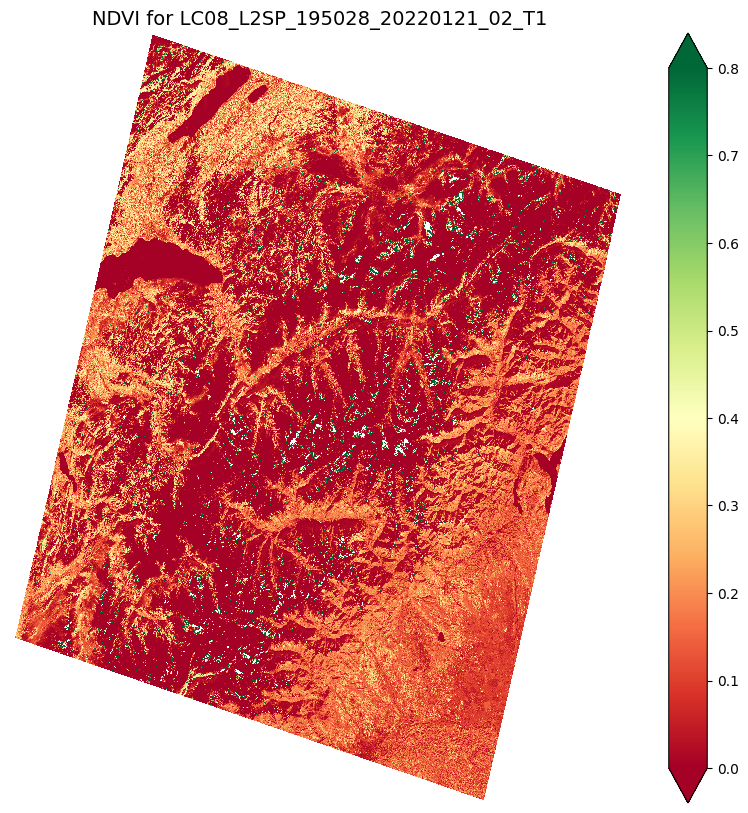

In [ ]:
# ==============================================================================
#  1. INSTALL AND AUTHENTICATE
#     This section installs the necessary libraries and connects to your
#     Google Earth Engine account.
# ==============================================================================
# Use -q for a quiet installation to keep the output clean
print("Installing required libraries...")
!pip install earthengine-api -q
!pip install geemap -q

import ee
import geemap

# Trigger the authentication flow.
# You'll need to click a link, log in with your Google account,
# and paste the authorization code back into the input box.
try:
    # Replace "YOUR_PROJECT_ID" with your actual Google Cloud Project ID.
    # You can find your project ID in the Google Cloud Console.
    ee.Initialize(project="magnetic-hawk-470413-k1")
except Exception as e:
    print("Authentication needed. Please follow the prompts.")
    ee.Authenticate()
    # Replace "YOUR_PROJECT_ID" with your actual Google Cloud Project ID.
    # You can find your project ID in the Google Cloud Console.
    ee.Initialize(project="magnetic-hawk-470413-k1")

print("✅ GEE initialized successfully.")

# ==============================================================================
#  2. DATA PROCESSING
#     This section finds the satellite image and calculates NDVI,
#     just like the JavaScript version.
# ==============================================================================
print("Processing satellite data...")

# Define the area of interest (same as before, over Switzerland)
point_of_interest = ee.Geometry.Point(6.746, 46.529)

# Access the Landsat 9 Surface Reflectance collection
collection = (
    ee.ImageCollection('LANDSAT/LC09/C02/T1_L2')
    .filterDate('2022-01-01', '2022-02-01')
    .filterBounds(point_of_interest)
)

# Find the least cloudy image in the collection ☁️
image = collection.sort('CLOUD_COVER').first()

# Calculate NDVI 🌱
# Landsat 9 bands: NIR is B5, Red is B4.
ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')

# ==============================================================================
#  3. VISUALIZATION
#     This section defines how the layers will look and displays them
#     on an interactive map.
# ==============================================================================
print("Creating map...")

# Define visualization parameters for the true-color image
true_color_vis = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 8000,
  'max': 13000,
}

# Define a color palette for the NDVI layer
ndvi_palette = {
  'min': 0.0,
  'max': 0.8,
  'palette': [
      '#ffffe5', '#f7fcb9', '#d9f0a3', '#addd8e', '#78c679', '#41ab5d',
      '#238443', '#005a32'
  ]
}

# Create a geemap Map object
Map = geemap.Map()

# Center the map on our area of interest
Map.centerObject(point_of_interest, 9)

# Add the data layers to the map
Map.addLayer(image, true_color_vis, 'True Color Image')
Map.addLayer(ndvi, ndvi_palette, 'NDVI')

# Display the map in the Colab output 🗺️
print("Displaying map. You may need to scroll down to see it.")
Map

Epoch 0 | Loss: 1.4300
Epoch 1 | Loss: 1.3382
Epoch 2 | Loss: 1.2449
Epoch 3 | Loss: 1.2164
Epoch 4 | Loss: 1.1363
Epoch 5 | Loss: 1.0877
Epoch 6 | Loss: 1.0734
Epoch 7 | Loss: 1.0345
Epoch 8 | Loss: 1.1044
Epoch 9 | Loss: 1.0185
Epoch 10 | Loss: 1.0176
Epoch 11 | Loss: 1.0372
Epoch 12 | Loss: 0.9984
Epoch 13 | Loss: 1.0428
Epoch 14 | Loss: 1.0501
Epoch 15 | Loss: 1.0383
Epoch 16 | Loss: 1.0277
Epoch 17 | Loss: 1.0536
Epoch 18 | Loss: 1.0504
Epoch 19 | Loss: 1.0450
Epoch 20 | Loss: 1.1093
Epoch 21 | Loss: 1.0333
Epoch 22 | Loss: 1.1576
Epoch 23 | Loss: 0.9515
Epoch 24 | Loss: 1.0337
Epoch 25 | Loss: 1.0257
Epoch 26 | Loss: 1.0278
Epoch 27 | Loss: 0.9941
Epoch 28 | Loss: 1.0445
Epoch 29 | Loss: 1.0337
Epoch 30 | Loss: 0.9875
Epoch 31 | Loss: 0.9658
Epoch 32 | Loss: 1.0323
Epoch 33 | Loss: 1.0288
Epoch 34 | Loss: 1.0169
Epoch 35 | Loss: 0.9852
Epoch 36 | Loss: 1.0581
Epoch 37 | Loss: 1.0134
Epoch 38 | Loss: 1.0146
Epoch 39 | Loss: 1.0363
Epoch 40 | Loss: 1.0497
Epoch 41 | Loss: 1.0269
Ep

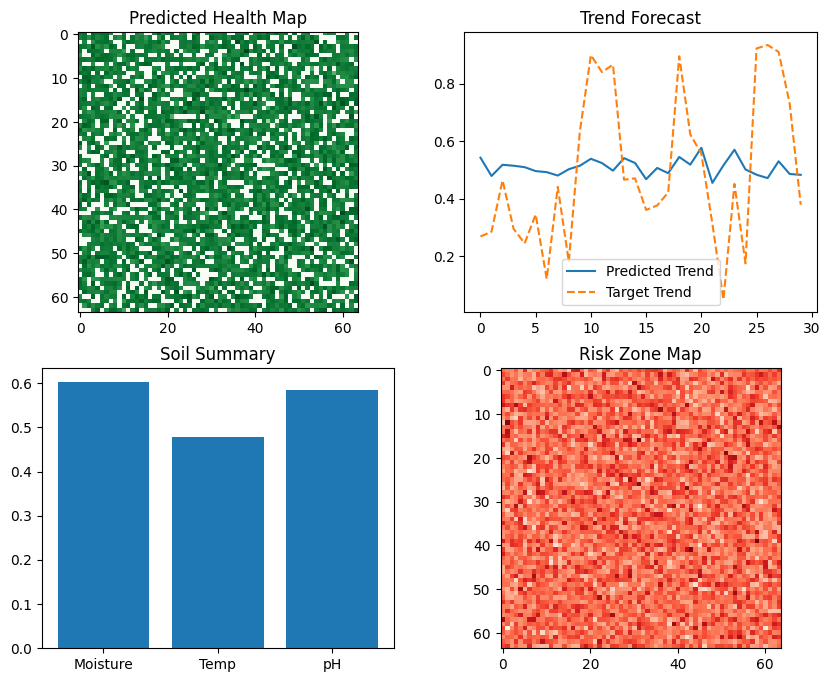

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random

# -------------------------
# Synthetic Dataset
# -------------------------
class AgriDataset(Dataset):
    def __init__(self, n_samples=100, img_size=64, bands=10, seq_len=30, features=5):
        self.n_samples = n_samples
        self.img_size = img_size
        self.bands = bands
        self.seq_len = seq_len
        self.features = features

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        # Satellite image (Bands, H, W)
        img = np.random.rand(self.bands, self.img_size, self.img_size).astype(np.float32)
        # Sensor time-series (T, Features)
        seq = np.random.rand(self.seq_len, self.features).astype(np.float32)

        # Targets
        health = np.random.rand(1, self.img_size, self.img_size).astype(np.float32)
        trend = np.random.rand(30).astype(np.float32)
        soil = np.random.rand(3).astype(np.float32)
        risk = np.random.randint(0, 2, (1, self.img_size, self.img_size)).astype(np.float32)

        targets = {
            "health": torch.tensor(health),
            "trend": torch.tensor(trend),
            "soil": torch.tensor(soil),
            "risk": torch.tensor(risk),
        }

        return torch.tensor(img), torch.tensor(seq), targets


# -------------------------
# Spectral-Spatial Encoder (MobileNetV2 backbone)
# -------------------------
class SpectralSpatialEncoder(nn.Module):
    def __init__(self, in_channels=10, hidden_dim=128):
        super().__init__()
        self.adapter = nn.Conv2d(in_channels, 3, kernel_size=1)  # reduce bands → 3 channels
        mobilenet = models.mobilenet_v2(weights="IMAGENET1K_V1")

        # freeze most layers
        for param in mobilenet.features.parameters():
            param.requires_grad = False

        self.backbone = mobilenet.features
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(1280, hidden_dim)

    def forward(self, x):
        x = self.adapter(x)  # (B,3,H,W)
        feat = self.backbone(x)
        feat = self.pool(feat).view(x.size(0), -1)
        return self.fc(feat)


# -------------------------
# Temporal Encoder (GRU)
# -------------------------
class TemporalEncoder(nn.Module):
    def __init__(self, input_dim=5, hidden_dim=128):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)

    def forward(self, x):
        _, h = self.gru(x)  # h: (1,B,H)
        return h.squeeze(0)


# -------------------------
# Fusion Layer
# -------------------------
class FusionLayer(nn.Module):
    def __init__(self, dim=128):
        super().__init__()
        self.gate = nn.Linear(dim*2, dim)

    def forward(self, spectral, temporal):
        fused = torch.cat([spectral, temporal], dim=1)
        return F.relu(self.gate(fused))


# -------------------------
# Multi-task Decoder Heads
# -------------------------
class MultiTaskDecoder(nn.Module):
    def __init__(self, embed_dim=128, map_size=64):
        super().__init__()
        self.map_size = map_size

        # Health Map Head
        self.health_head = nn.Sequential(
            nn.Linear(embed_dim, map_size*map_size),
            nn.ReLU()
        )
        # Trend & Alert Head
        self.trend_head = nn.Linear(embed_dim, 30)
        # Soil Summary Head
        self.soil_head = nn.Linear(embed_dim, 3)
        # Risk Zone Head
        self.risk_head = nn.Linear(embed_dim, map_size*map_size)

    def forward(self, fused):
        health_map = self.health_head(fused).view(-1,1,self.map_size,self.map_size)
        trend = self.trend_head(fused)
        soil = self.soil_head(fused)
        risk_map = self.risk_head(fused).view(-1,1,self.map_size,self.map_size)
        return health_map, trend, soil, risk_map


# -------------------------
# Full Model
# -------------------------
class AgriFusionNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.spectral_encoder = SpectralSpatialEncoder()
        self.temporal_encoder = TemporalEncoder()
        self.fusion = FusionLayer()
        self.decoder = MultiTaskDecoder()

    def forward(self, spectral_img, sensor_seq):
        spectral_feat = self.spectral_encoder(spectral_img)
        temporal_feat = self.temporal_encoder(sensor_seq)
        fused = self.fusion(spectral_feat, temporal_feat)
        return self.decoder(fused)


# -------------------------
# Training Utilities
# -------------------------
def multitask_loss(outputs, targets):
    health_map, trend, soil, risk_map = outputs
    health_loss = F.mse_loss(health_map, targets["health"])
    trend_loss = F.mse_loss(trend, targets["trend"])
    soil_loss = F.mse_loss(soil, targets["soil"])
    risk_loss = F.binary_cross_entropy_with_logits(risk_map, targets["risk"])
    return health_loss + trend_loss + soil_loss + risk_loss


# -------------------------
# Visualization
# -------------------------
def visualize_outputs(img, seq, outputs, targets):
    health_map, trend, soil, risk_map = outputs
    health_map, risk_map = torch.sigmoid(health_map[0,0]).detach().cpu(), torch.sigmoid(risk_map[0,0]).detach().cpu()
    trend, soil = trend[0].detach().cpu(), soil[0].detach().cpu()

    fig, axs = plt.subplots(2,2, figsize=(10,8))
    axs[0,0].imshow(health_map, cmap="Greens")
    axs[0,0].set_title("Predicted Health Map")

    axs[0,1].plot(trend.numpy(), label="Predicted Trend")
    axs[0,1].plot(targets["trend"].numpy(), label="Target Trend", linestyle="--")
    axs[0,1].legend()
    axs[0,1].set_title("Trend Forecast")

    axs[1,0].bar(["Moisture","Temp","pH"], soil.numpy())
    axs[1,0].set_title("Soil Summary")

    axs[1,1].imshow(risk_map, cmap="Reds")
    axs[1,1].set_title("Risk Zone Map")

    plt.show()


# -------------------------
# Main Training Loop (Demo)
# -------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
dataset = AgriDataset(n_samples=20)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = AgriFusionNet().to(device)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

for epoch in range(50):  # demo only
    for imgs, seqs, targets in dataloader:
        imgs, seqs = imgs.to(device), seqs.to(device)
        targets = {k:v.to(device) for k,v in targets.items()}

        outputs = model(imgs, seqs)
        loss = multitask_loss(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch} | Loss: {loss.item():.4f}")

# Visualize 1 sample
sample_img, sample_seq, sample_targets = dataset[0]
with torch.no_grad():
    outputs = model(sample_img.unsqueeze(0).to(device), sample_seq.unsqueeze(0).to(device))
visualize_outputs(sample_img, sample_seq, outputs, sample_targets)


Performing inference on a single random sample from EuroSAT...


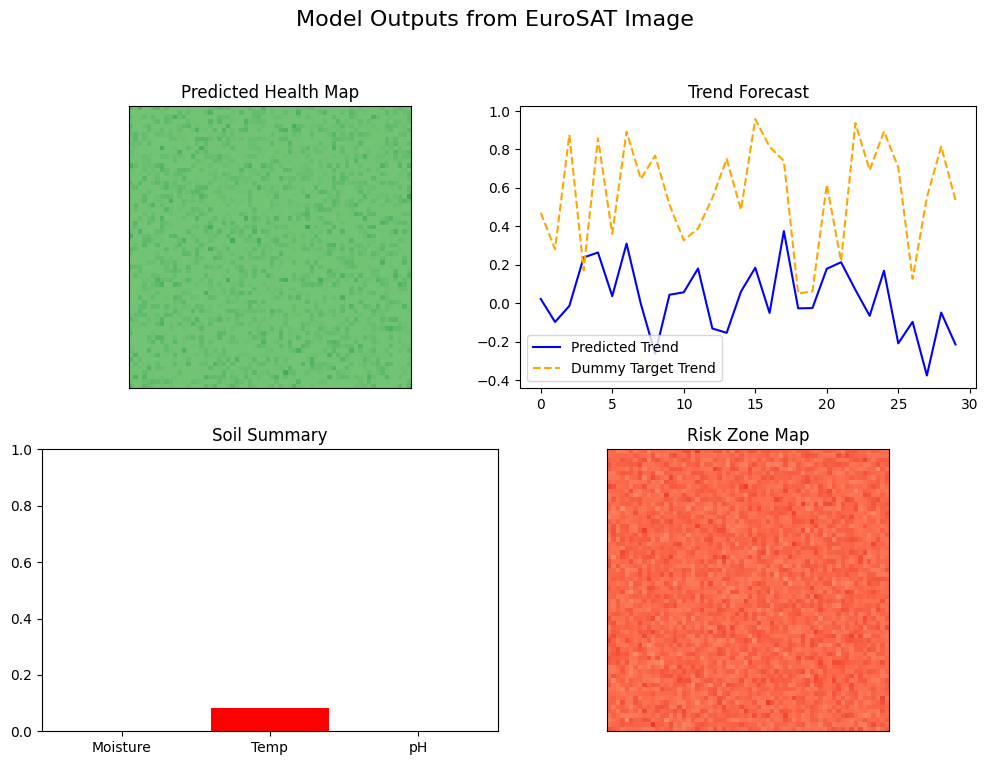

Input Image from EuroSAT:


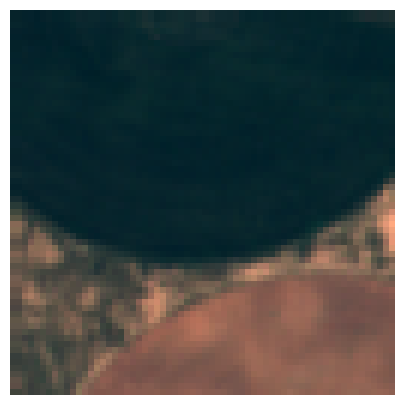

In [ ]:
# ==============================================================================
#  5. VISUALIZE A SINGLE SAMPLE
# ==============================================================================
print("Performing inference on a single random sample from EuroSAT...")

# 1. Get a real satellite image from the EuroSAT dataset
real_image = dataset[random.randint(0, len(dataset)-1)]

# 2. Generate dummy data for the inputs and targets the model needs
#    (since EuroSAT doesn't provide them)
dummy_sensor_seq = torch.rand(1, 30, 5) # (Batch, Time, Features)
dummy_targets = {
    "trend": torch.rand(30) # For visualization comparison
}

# 3. Run inference with the model
with torch.no_grad():
    model.eval()
    # We use the real image and the dummy sensor data
    outputs = model(real_image.unsqueeze(0).to(device), dummy_sensor_seq.to(device))

# 4. Call the visualization function
visualize_outputs(real_image, dummy_sensor_seq, outputs, dummy_targets)

# 5. Also, let's show the actual EuroSAT image that was used as input
print("Input Image from EuroSAT:")
# The EuroSAT bands are B1-B12. RGB are B4, B3, B2.
# Indices in the tensor are: Red=3, Green=2, Blue=1
rgb_img = real_image[[3, 2, 1], :, :].permute(1, 2, 0).numpy()
# Normalize for visualization
rgb_img = (rgb_img - rgb_img.min()) / (rgb_img.max() - rgb_img.min())
plt.figure(figsize=(5, 5))
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

Performing inference on a single random sample from EuroSAT...


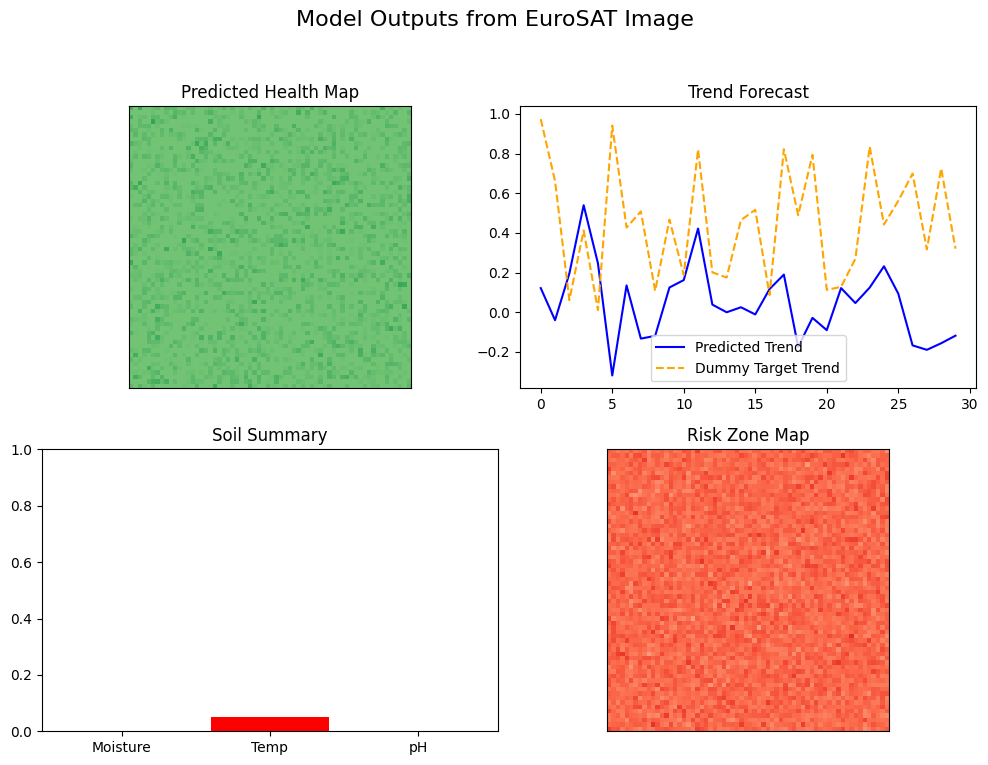

Input Image from EuroSAT:


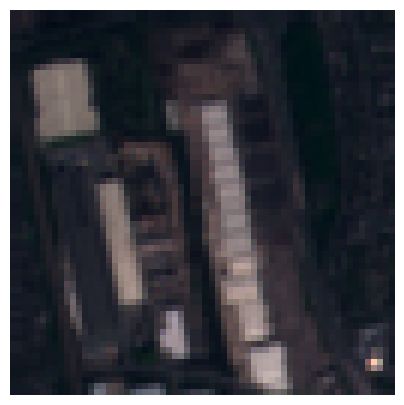

In [ ]:
# ==============================================================================
#  5. VISUALIZE A SINGLE SAMPLE
# ==============================================================================
print("Performing inference on a single random sample from EuroSAT...")

# 1. Get a real satellite image from the EuroSAT dataset
real_image = dataset[random.randint(0, len(dataset)-1)]

# 2. Generate dummy data for the inputs and targets the model needs
#    (since EuroSAT doesn't provide them)
dummy_sensor_seq = torch.rand(1, 30, 5) # (Batch, Time, Features)
dummy_targets = {
    "trend": torch.rand(30) # For visualization comparison
}

# 3. Run inference with the model
with torch.no_grad():
    model.eval()
    # We use the real image and the dummy sensor data
    outputs = model(real_image.unsqueeze(0).to(device), dummy_sensor_seq.to(device))

# 4. Call the visualization function
visualize_outputs(real_image, dummy_sensor_seq, outputs, dummy_targets)

# 5. Also, let's show the actual EuroSAT image that was used as input
print("Input Image from EuroSAT:")
# The EuroSAT bands are B1-B12. RGB are B4, B3, B2.
# Indices in the tensor are: Red=3, Green=2, Blue=1
rgb_img = real_image[[3, 2, 1], :, :].permute(1, 2, 0).numpy()
# Normalize for visualization
rgb_img = (rgb_img - rgb_img.min()) / (rgb_img.max() - rgb_img.min())
plt.figure(figsize=(5, 5))
plt.imshow(rgb_img)
plt.axis('off')
plt.show()


--- Prediction Example ---
True Class: Pasture
Predicted Class: Highway


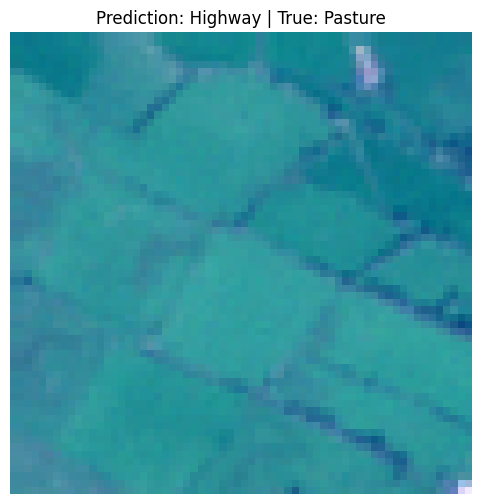

In [ ]:
# ==============================================================================
#  5. VISUALIZE A PREDICTION
# ==============================================================================
# Get a single sample to test and visualize
img, label = train_dataset[random.randint(0, len(train_dataset)-1)]

with torch.no_grad():
    model.eval()
    output = model(img.unsqueeze(0).to(device))
    _, predicted_idx = torch.max(output.data, 1)
    predicted_class_idx = predicted_idx.item()

class_names = train_dataset.classes
true_class_name = class_names[label]
predicted_class_name = class_names[predicted_class_idx]

print(f"\n--- Prediction Example ---")
print(f"True Class: {true_class_name}")
print(f"Predicted Class: {predicted_class_name}")

# Visualize the composite image using a standard RGB representation
# The EuroSAT bands are B1-B12. RGB are B4, B3, B2.
# Indices in the tensor are: Red=3, Green=2, Blue=1
rgb_img = img[[3, 2, 1], :, :].permute(1, 2, 0).numpy()

# Normalize for visualization
rgb_img = (rgb_img - rgb_img.min()) / (rgb_img.max() - rgb_img.min())

plt.figure(figsize=(6, 6))
plt.imshow(rgb_img)
plt.title(f"Prediction: {predicted_class_name} | True: {true_class_name}")
plt.axis('off')
plt.show()
